# Question - 1

## Load and Explore the Dataset



In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

if (!requireNamespace("ggdendro", quietly = TRUE)) {
    install.packages("ggdendro")
}

install.packages("bigstatsr")
install.packages("pheatmap")
install.packages("pwr")
install.packages("cluster")

library(bigstatsr)
library(pheatmap)

library(ggplot2)
library(ggdendro)

BiocManager::install("limma")
library(limma)

library(pwr)
library(cluster)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.0 (2024-04-24)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'limma'”
Old packages: 'backports', 'bit', 'brio', 'broom', 'bslib', 'cachem', 'callr',
  'curl', 'data.table', 'DBI', 'dbplyr', 'devtools', 'digest', 'farver',
  'fastmap', 'fs', 'gargle', 'ggplot2', 'gh', 'gtable', 'highr', 'htmltools',
  'httr2', 'isoband', 'knitr', 'munse

In [ ]:
data <- read.table("EngreitzLabACBDataSet.txt", header=TRUE) # Load the dataset

dim(data)  # Check the dimensions


[1] 14131   123

In [ ]:
summary(data) # Summary statistics

sum(is.na(data)) # Checking for missing values


     Cell1              Cell2              Cell3             Cell4        
 Min.   :  0.0000   Min.   :  0.0000   Min.   : 0.0000   Min.   : 0.0000  
 1st Qu.:  0.0000   1st Qu.:  0.0000   1st Qu.: 0.0000   1st Qu.: 0.0000  
 Median :  0.0000   Median :  0.0000   Median : 0.0000   Median : 0.0000  
 Mean   :  0.4897   Mean   :  0.6012   Mean   : 0.4019   Mean   : 0.3146  
 3rd Qu.:  0.0000   3rd Qu.:  0.0000   3rd Qu.: 0.0000   3rd Qu.: 0.0000  
 Max.   :150.0000   Max.   :120.0000   Max.   :75.0000   Max.   :81.0000  
     Cell5             Cell6             Cell7              Cell8        
 Min.   : 0.0000   Min.   : 0.0000   Min.   :  0.0000   Min.   : 0.0000  
 1st Qu.: 0.0000   1st Qu.: 0.0000   1st Qu.:  0.0000   1st Qu.: 0.0000  
 Median : 0.0000   Median : 0.0000   Median :  0.0000   Median : 0.0000  
 Mean   : 0.2929   Mean   : 0.2604   Mean   :  0.2399   Mean   : 0.2149  
 3rd Qu.: 0.0000   3rd Qu.: 0.0000   3rd Qu.:  0.0000   3rd Qu.: 0.0000  
 Max.   :68.0000   Max.   :58.0

[1] 0

## Visualize Gene Expression Distribution


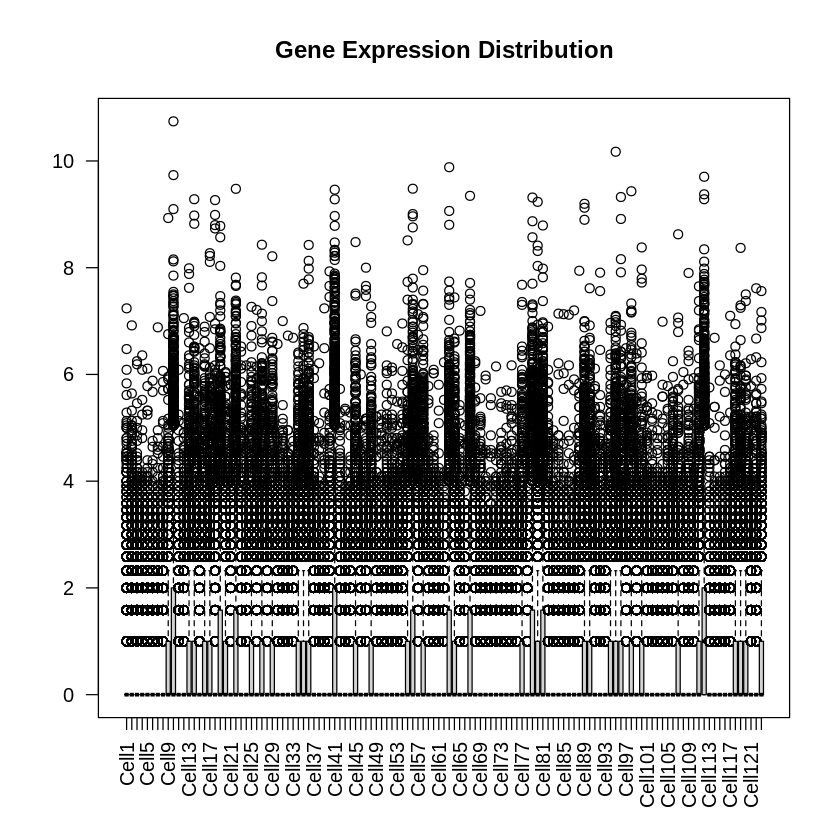

In [ ]:
boxplot(log2(data + 1), main="Gene Expression Distribution", las=2)


## Normalize the Data


In [ ]:
log_data <- log2(data + 1)  # Log2 transformation to handle skewness

scaled_data <- scale(log_data)  # Standard scaling


## Principal Component Analysis (PCA)


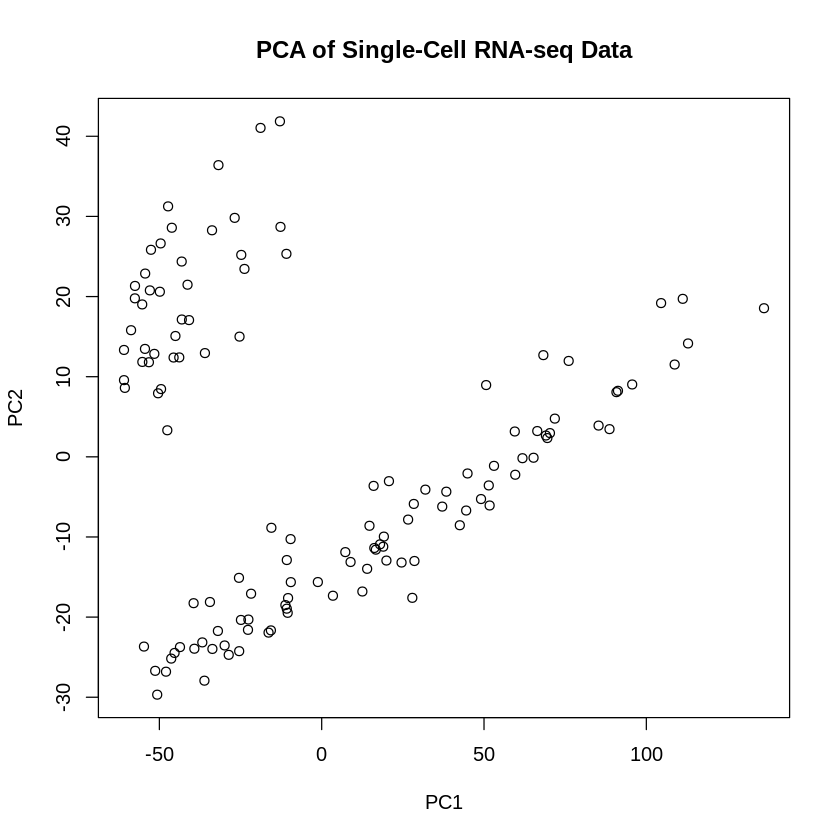

In [ ]:
pca_result <- prcomp(t(scaled_data), scale = TRUE) # Perform PCA

plot(pca_result$x[,1], pca_result$x[,2], xlab="PC1", ylab="PC2", main="PCA of Single-Cell RNA-seq Data") # Plot PCA results


## Hierarchical Clustering


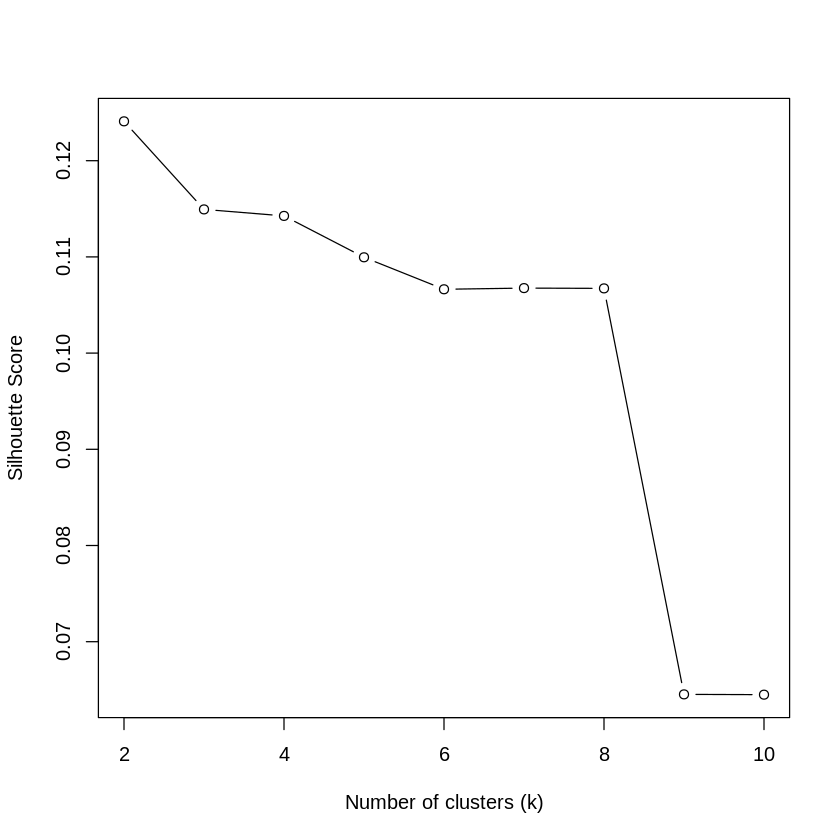

In [ ]:
# Perform hierarchical clustering
dist_matrix <- dist(t(scaled_data))
hc <- hclust(dist_matrix, method = "complete")
dendro_data <- dendro_data(hc)

dendro_plot <- ggplot(dendro_data$segments) +
  geom_segment(aes(x = x, y = y, xend = xend, yend = yend)) +
  theme_minimal(base_size = 15) +
  ggtitle("Hierarchical Clustering Dendrogram") # Plot dendrogram

pca_result <- prcomp(t(scaled_data), scale = TRUE) # Perform PCA

dist_matrix <- dist(t(scaled_data)) # Calculate distance matrix

silhouette_scores <- numeric(9)  # Preallocate vector for silhouette scores

# Calculate silhouette score
for (k in 2:10) {
  clusters <- cutree(hc, k = k)

  silhouette_widths <- silhouette(clusters, dist = dist_matrix)

  silhouette_scores[k - 1] <- mean(silhouette_widths[, "sil_width"])
}

plot(2:10, silhouette_scores, type = "b", xlab = "Number of clusters (k)", ylab = "Silhouette Score") # Plot silhouette scores


In [ ]:
optimal_k_index <- which.max(silhouette_scores) # Find the index of the maximum silhouette score

optimal_k <- optimal_k_index + 1  # Corresponding optimal number of clusters (k)

max_silhouette_score <- silhouette_scores[optimal_k_index] # Corresponding silhouette score

cat("Optimal number of clusters (k):", optimal_k, "\n")
cat("Corresponding maximum silhouette score:", max_silhouette_score, "\n")

Optimal number of clusters (k): 2 
Corresponding maximum silhouette score: 0.1240936 


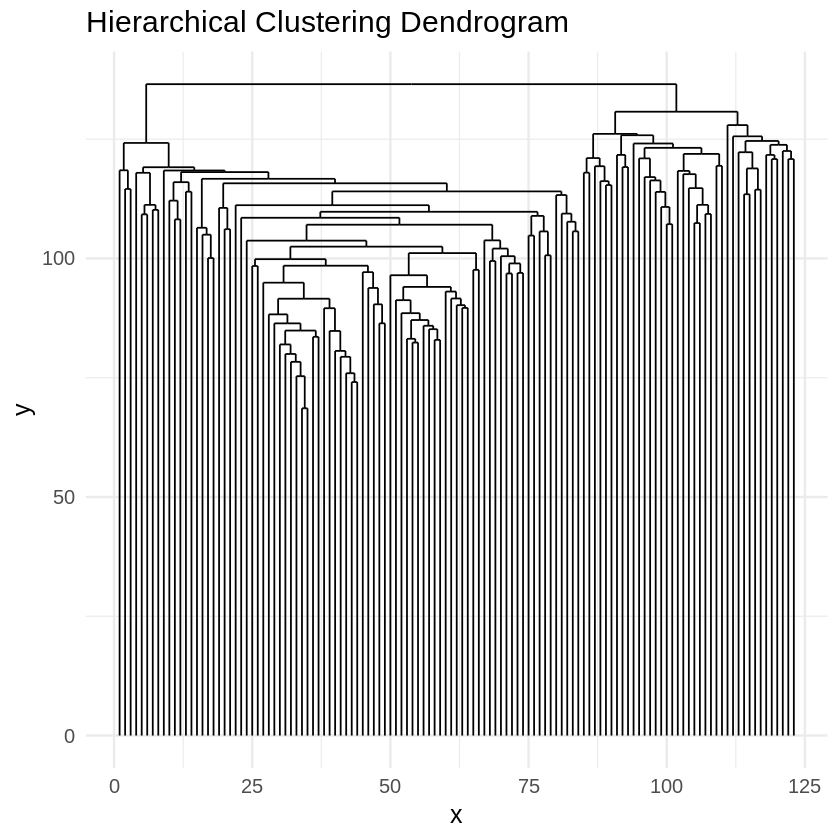

In [ ]:
hc <- hclust(dist_matrix, method = "complete")
clusters <- cutree(hc, k = optimal_k) # Perform hierarchical clustering with optimal number of clusters

dendro_data <- dendro_data(hc) # Convert hierarchical clustering to a dendrogram object

# Plot dendrogram
ggplot(dendro_data$segments) +
  geom_segment(aes(x = x, y = y, xend = xend, yend = yend)) +
  theme_minimal(base_size = 15) +
  ggtitle("Hierarchical Clustering Dendrogram")

pca_result <- prcomp(t(scaled_data), scale = TRUE) # Perform PCA

## PCA with Clustering


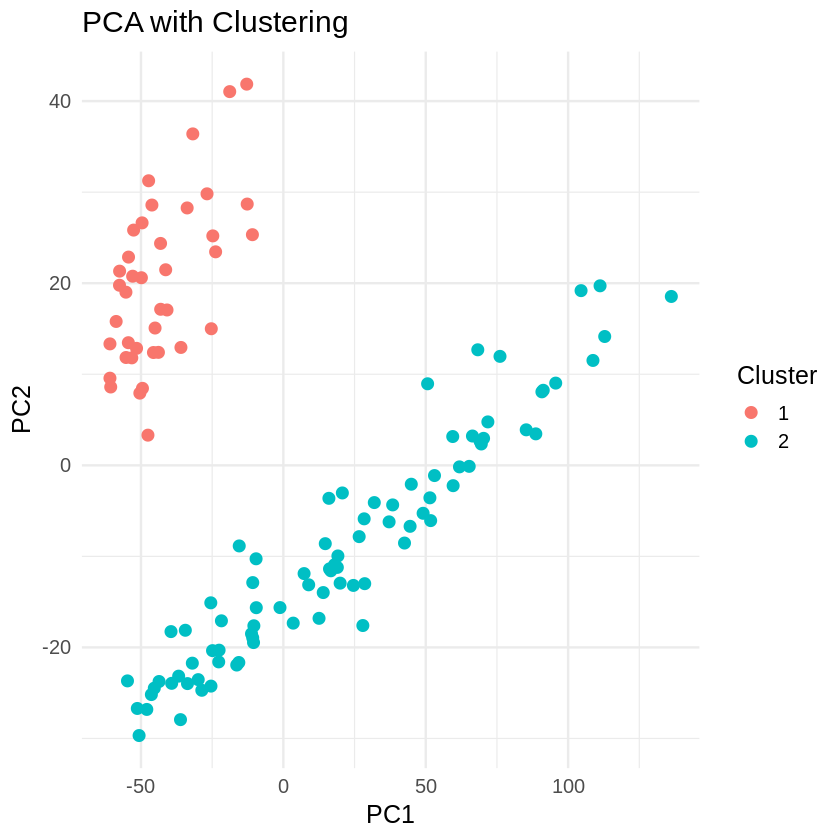

In [ ]:
# Prepare and plot PCA data by cluster for ggplot
pca_df <- data.frame(PC1 = pca_result$x[,1], PC2 = pca_result$x[,2], Cluster = factor(clusters))

ggplot(pca_df, aes(x=PC1, y=PC2, color=Cluster)) +
  geom_point(size=3) +
  theme_minimal(base_size = 15) +
  ggtitle("PCA with Clustering")

## Gene Variability Analysis

   user  system elapsed 
  0.033   0.001   0.034 

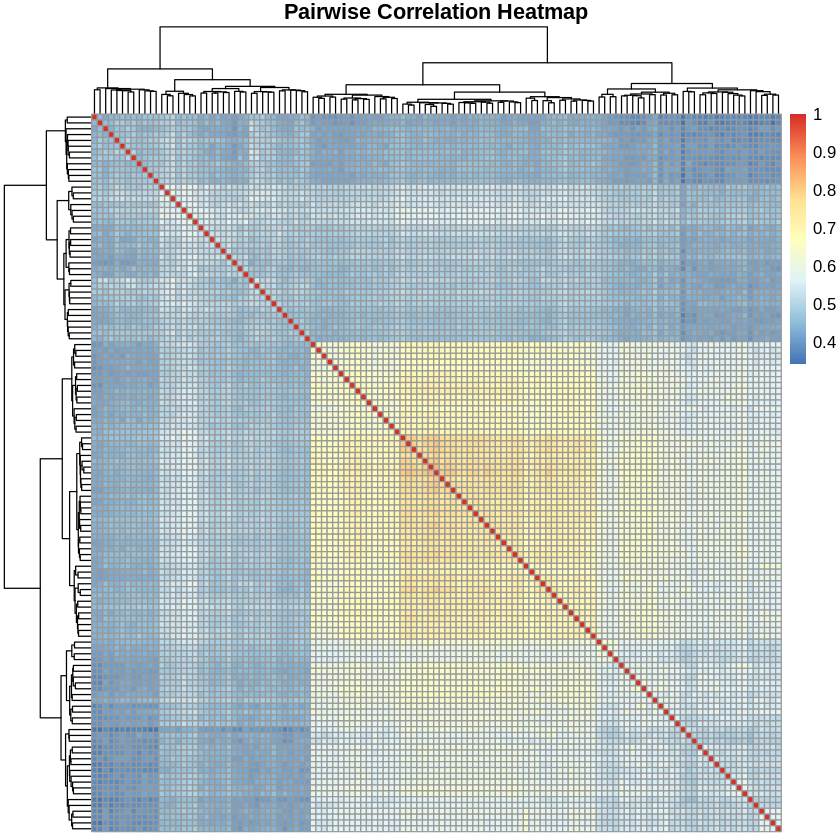

In [ ]:
gene_variances <- apply(scaled_data, 1, var) # Calculating the variance for each gene

all_genes <- 1:nrow(scaled_data)

all_data_fbm <- as_FBM(scaled_data) # Convert all data to FBM

system.time({
  correlation_matrix <- big_cor(all_data_fbm)
}) # Calculating correlation matrix for all genes

pheatmap(correlation_matrix[], main="Pairwise Correlation Heatmap") # Visualize the correlation matrix using pheatmap

# Question - 2

## Set parameters

In [ ]:
lambda_control <- 0.1  # Expected count per sample in control

lambda_experiment <- 0.11  # Expected count per sample in experimental

total_genes <- 1000  # Total number of genes tested

alpha <- 0.05 / total_genes  # Bonferroni-corrected significance level

## Define Power Calculation Function

In [ ]:
calculate_power <- function(n, lambda_control, lambda_experiment, alpha) {
  # Simulate data for control and experiment
  control_counts <- rpois(n, lambda_control)
  experiment_counts <- rpois(n, lambda_experiment + 0.1)  # Simulate 10% increase


  t_test <- t.test(control_counts, experiment_counts) # Perform a t-test


  power <- power.t.test(n = n, delta = 0.1, sd = sqrt(var(control_counts)), sig.level = alpha, type = "two.sample")$power # Calculate power

  if (!is.na(power)) {
    return(power)
  } else {
    return(0)
  }
}

## Calculate Power for Different Sample Sizes

In [ ]:
sample_sizes <- seq(10, 1000, by = 10) # Range of sample sizes

powers <- sapply(sample_sizes, calculate_power, lambda_control = lambda_control, lambda_experiment = lambda_experiment, alpha = alpha) # Calculate power for each sample size

## Plot Power Curve

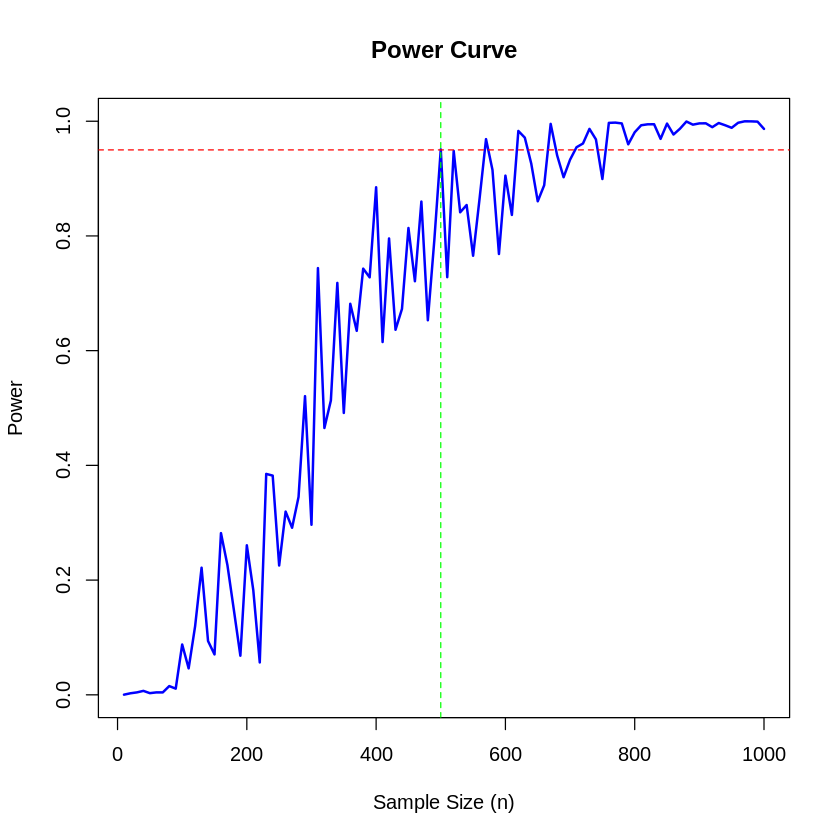

In [ ]:
plot(sample_sizes, powers, type = "l", col = "blue", lwd = 2, xlab = "Sample Size (n)", ylab = "Power", main = "Power Curve") # Plot power curve

if (any(powers >= 0.95)) {
  abline(h = 0.95, col = "red", lty = 2)
  abline(v = sample_sizes[which.max(powers >= 0.95)], col = "green", lty = 2)
} else {
  cat("No sample size achieves 95% power within the range tested.")
} # Add lines for 95% power and corresponding sample size


In [ ]:
required_sample_size <- sample_sizes[which(powers >= 0.95)[1]]
cat("Required sample size for 95% power:", required_sample_size, "\n") # Print the required sample size for 95% power


Required sample size for 95% power: 500 
